# Importação das bibliotecas e upload do dataset

## Blibliotecas


In [ ]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, RepeatedStratifiedKFold 
from sklearn.metrics import accuracy_score, classification_report, precision_score, \
confusion_matrix, plot_confusion_matrix, multilabel_confusion_matrix,recall_score,f1_score

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize, StandardScaler, OneHotEncoder
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

from scipy.stats import wilcoxon

from itertools import cycle

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow.keras as keras
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Datasets


### Datasets train

In [ ]:
#Importação do arquivo de Train
df_train_full = pd.read_csv('https://raw.githubusercontent.com/ArturGuilherme/tcc-avaliacao-classificadores/master/classifiers/data/raw/operacao_normal_falha2.3.13.17.csv',sep=';',decimal='.')
df_train_full.data = pd.to_datetime(df_train_full['data'],format="%d/%m/%Y %H:%M")
print(df_train_full['data'].min())
print(df_train_full['data'].max())
#Teste da im portação
df_train_full.reset_index(inplace=True,drop=True)

2020-09-01 00:00:00
2020-09-09 08:30:00


In [ ]:
df_train = df_train_full.copy()

### Datasets test

In [ ]:
#Importação do arquivo de test
df_test_17 = pd.read_csv('https://raw.githubusercontent.com/ArturGuilherme/tcc-avaliacao-classificadores/master/classifiers/data/raw/operacao_normal_falha17_test.csv',sep=';',decimal='.')
df_test_17.data = pd.to_datetime(df_test_17['data'],format="%d/%m/%Y %H:%M")
print(df_test_17['data'].min())
print(df_test_17['data'].max())
#Teste da importação
df_test_17.reset_index(inplace=True,drop=True)

2020-12-03 08:30:00
2020-12-05 10:30:00


In [ ]:
#Importação do arquivo de test
df_test_2 = pd.read_csv('https://raw.githubusercontent.com/ArturGuilherme/tcc-avaliacao-classificadores/master/classifiers/data/raw/operacao_normal_falha2_test.csv',sep=';',decimal='.')
df_test_2.data = pd.to_datetime(df_test_2['data'],format="%d/%m/%Y %H:%M")
print(df_test_2['data'].min())
print(df_test_2['data'].max())
#Teste da importação
df_test_2.reset_index(inplace=True,drop=True)

2021-02-10 00:00:00
2021-02-12 02:00:00


In [ ]:
#Importação do arquivo de test
df_test_3 = pd.read_csv('https://raw.githubusercontent.com/ArturGuilherme/tcc-avaliacao-classificadores/master/classifiers/data/raw/operacao_normal_falha3_test.csv',sep=';',decimal='.')
df_test_3.data = pd.to_datetime(df_test_3['data'],format="%d/%m/%Y %H:%M")
print(df_test_3['data'].min())
print(df_test_3['data'].max())
#Teste da importação
df_test_3.reset_index(inplace=True,drop=True)

2021-03-02 17:30:00
2021-03-04 19:30:00


In [ ]:
#Importação do arquivo de test
df_test_13 = pd.read_csv('https://raw.githubusercontent.com/ArturGuilherme/tcc-avaliacao-classificadores/master/classifiers/data/raw/operacao_normal_falha13_test.csv',sep=';',decimal='.')
df_test_13.data = pd.to_datetime(df_test_13['data'],format="%d/%m/%Y %H:%M")
print(df_test_13['data'].min())
print(df_test_13['data'].max())
#Teste da importação
df_test_13.reset_index(inplace=True,drop=True)

2021-03-20 00:10:00
2021-03-22 02:10:00


In [ ]:
df_test = df_test_2.copy()

# Análise Exploratória dos dados

## Dados missing e duplicados

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Concentração de entrada     1204 non-null   float64       
 1   Vazão de entrada            1204 non-null   float64       
 2   Temperatura de entrada      1204 non-null   float64       
 3   Nível do Reator             1204 non-null   float64       
 4   Concentração de Produto A   1204 non-null   float64       
 5   Concentração de Produto B   1204 non-null   float64       
 6   Temperatura do Reator       1204 non-null   float64       
 7   Vazão de Refrigerante       1204 non-null   float64       
 8   Vazão de Produto            1204 non-null   float64       
 9   Temperatura Refrigerante    1204 non-null   float64       
 10  Pressão Refrigerante        1204 non-null   int64         
 11  Sinal de Controle Nível     1204 non-null   float64     

Dataset sem dados missing. Todos as features possuem 51170 amostras

In [ ]:
# Removendo as amostras duplicadas para que não ter problema de overfit
print(df_train.shape)
subset = df_train.columns[0:14]
df_train.drop_duplicates(subset=subset, inplace=True)
print(df_train.shape)

(1204, 16)
(1204, 16)


Sem amostras duplicadas

## Visualização das features

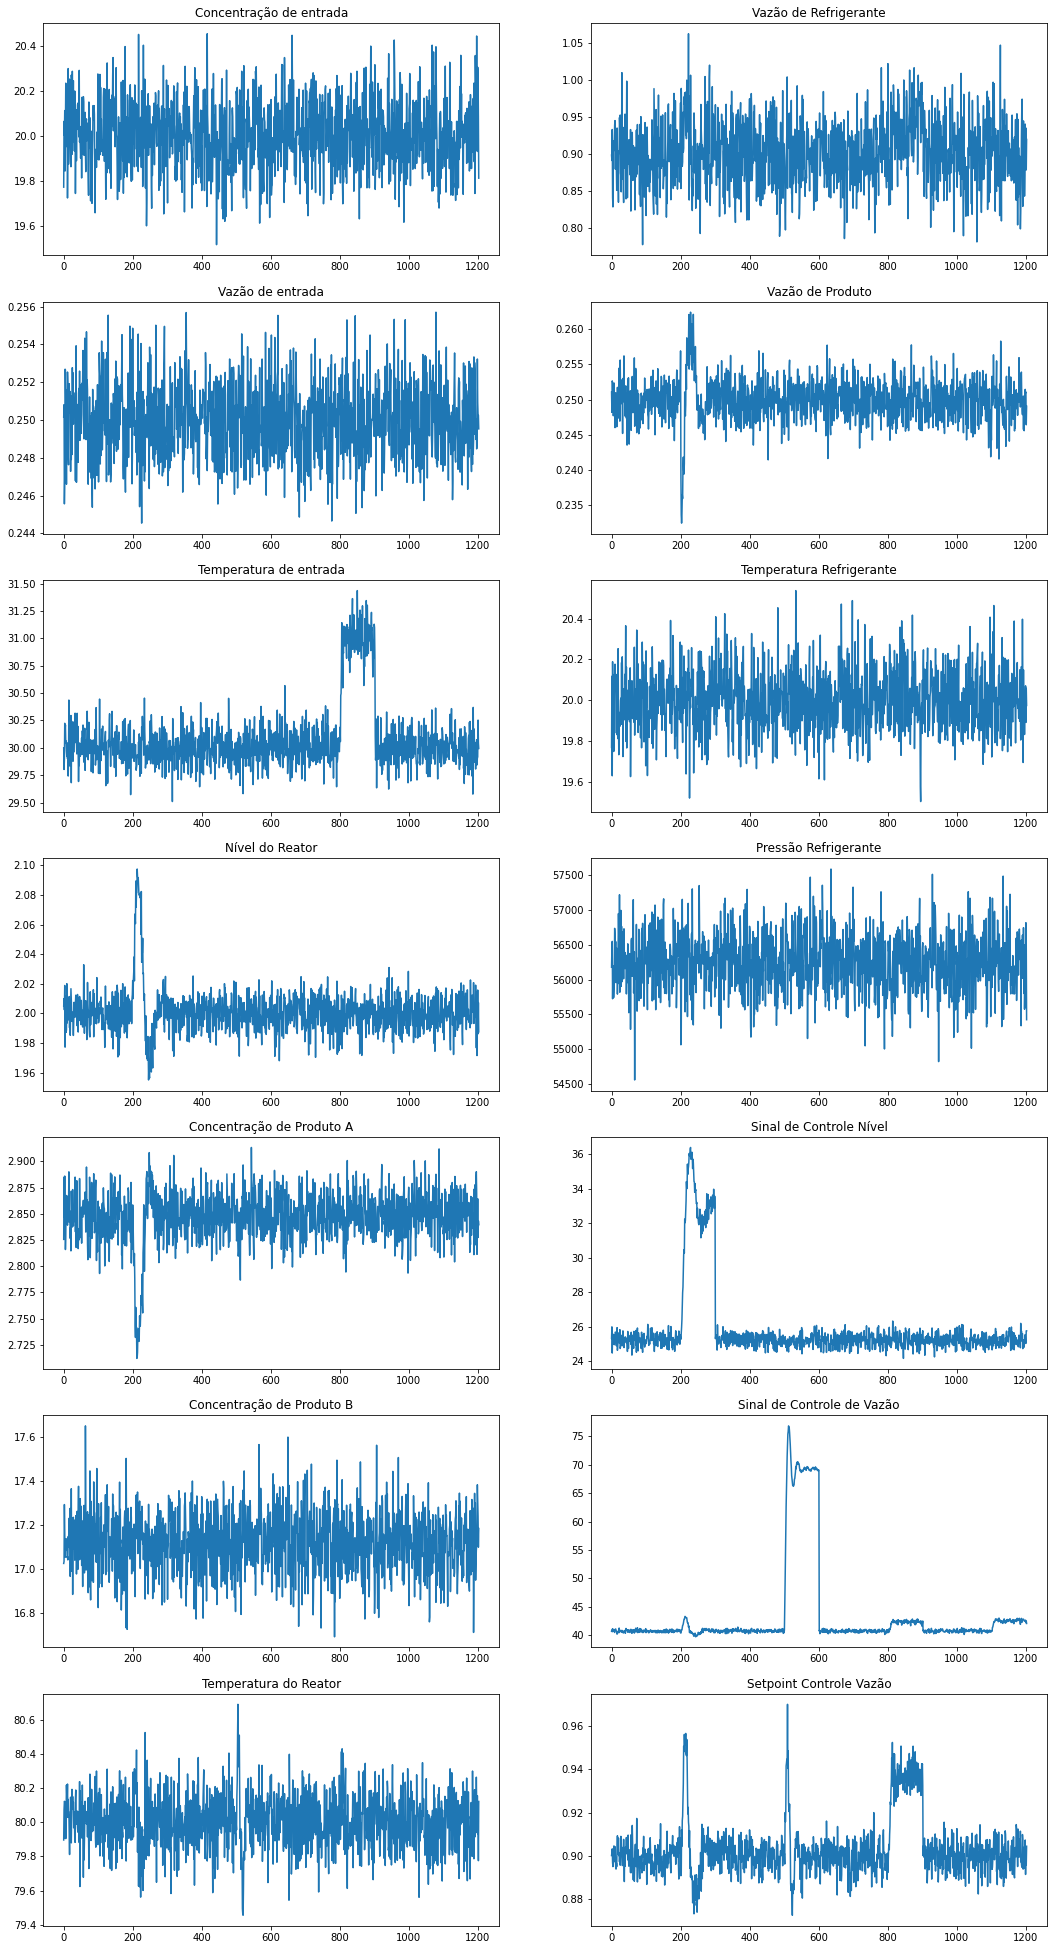

In [ ]:
#Visualizacao das features
df_aux = df_train.copy()
eixoX=list(range(len(df_aux)))
cols = list(df_aux.columns)
aux = 0
fig, axs = plt.subplots(7,2, figsize=(18, 35))
for x in range(0,2):
  for i in range(0,7):
    axs[i,x].plot(eixoX,df_aux.iloc[:,aux])
    axs[i,x].set_title(cols[aux])
    aux = aux+1

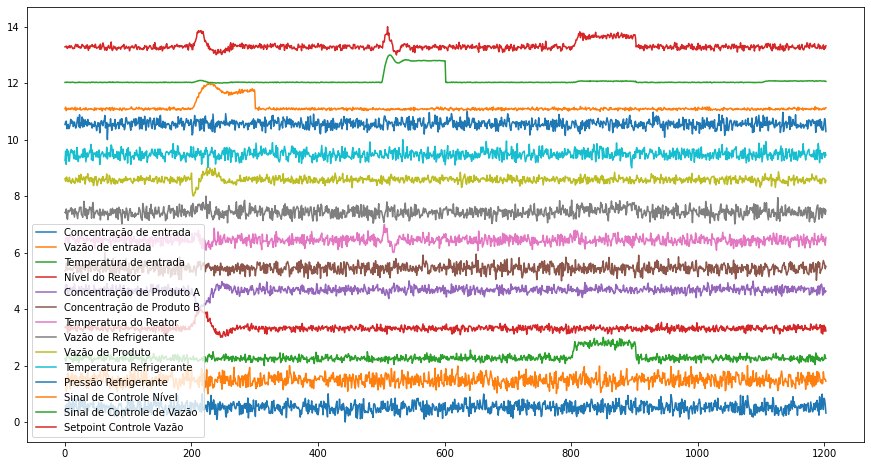

In [ ]:
# Visualização normalizada
df_aux = df_train.copy()
df_aux.drop(columns=['Falha','data'],inplace=True)

tamanho = df_aux.shape

eixo_x = range(tamanho[0])
start = 0
end = 1

colunas = df_aux.columns

fig, ax = plt.subplots(figsize=(15, 8)) 
for x in range(tamanho[1]):

    arr = df_aux.iloc[:, x]
    width = end - start
    res = (arr - arr.min())/np.ptp(arr) * width + start
    
    ax.plot(eixo_x, res, label=colunas[x])

    start = start+1
    end = end+1

ax.legend(loc="lower left")  # Add a legend.
fig.show()

In [ ]:
# Grafico de correlação
df_aux = df_train.copy()
df_aux.drop(columns=['Falha','data'],inplace=True)
df_aux.corr().style.background_gradient().set_precision(2)

,Concentração de entrada,Vazão de entrada,Temperatura de entrada,Nível do Reator,Concentração de Produto A,Concentração de Produto B,Temperatura do Reator,Vazão de Refrigerante,Vazão de Produto,Temperatura Refrigerante,Pressão Refrigerante,Sinal de Controle Nível,Sinal de Controle de Vazão,Setpoint Controle Vazão
Concentração de entrada,1.00,-0.01,0.01,0.03,-0.01,0.00,-0.03,0.03,0.01,0.00,-0.02,0.00,-0.01,0.04
Vazão de entrada,-0.01,1.00,-0.03,-0.01,0.06,-0.01,-0.01,0.04,-0.04,0.02,-0.00,-0.03,-0.01,-0.01
Temperatura de entrada,0.01,-0.03,1.00,-0.05,0.04,-0.04,0.02,0.18,0.03,0.01,-0.00,-0.08,-0.05,0.62
Nível do Reator,0.03,-0.01,-0.05,1.00,-0.44,0.06,-0.03,0.13,-0.01,0.00,-0.00,0.24,-0.01,0.25
Concentração de Produto A,-0.01,0.06,0.04,-0.44,1.00,-0.06,-0.01,-0.13,-0.04,0.00,-0.00,-0.25,0.02,-0.24
Concentração de Produto B,0.00,-0.01,-0.04,0.06,-0.06,1.00,0.01,0.03,0.04,0.02,0.03,0.00,0.04,-0.00
Temperatura do Reator,-0.03,-0.01,0.02,-0.03,-0.01,0.01,1.00,-0.05,-0.12,-0.05,0.01,-0.06,0.00,0.04
Vazão de Refrigerante,0.03,0.04,0.18,0.13,-0.13,0.03,-0.05,1.00,-0.02,0.00,0.00,0.07,-0.01,0.26
Vazão de Produto,0.01,-0.04,0.03,-0.01,-0.04,0.04,-0.12,-0.02,1.00,-0.01,0.01,0.18,0.02,-0.04
Temperatura Refrigerante,0.00,0.02,0.01,0.00,0.00,0.02,-0.05,0.00,-0.01,1.00,0.01,-0.02,-0.00,0.04


Não há feature que esteja muito correlacionada com o target. "Temperatura refrigerante" e "Sinal de nivel de controle" são as que mais se destacam.

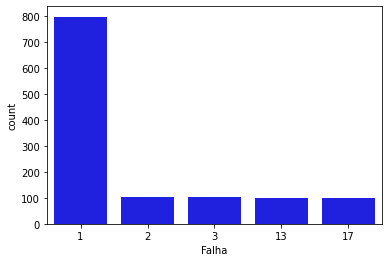

In [ ]:
#Anlise da distruibuição dos rotulos 
sns.countplot(df_train['Falha'], color='blue');

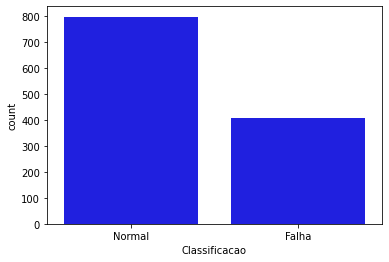

In [ ]:
df_aux = df_train.copy()
df_aux['Classificacao'] = 0
for index,row in df_aux.iterrows():
  if row['Falha'] != 1:
    df_aux.Classificacao.loc[index] = 'Falha'
  else:
    df_aux.Classificacao.loc[index] = 'Normal'
sns.countplot(df_aux['Classificacao'], color='blue');

## Normalização 

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
#Train
Y_train = df_train.Falha
X_train = df_train.drop(columns =['Falha','data'], axis=1)
labels_train = sorted(list(dict.fromkeys(Y_train))) # Monta uma lista com os os rotulos, sem valores duplicados e de ordem crescente

#scaling
columns = X_train.columns
X_train = pd.DataFrame(scaler.transform(X_train),columns=columns)

In [ ]:
#Teste
Y_test = df_test.Falha
X_test = df_test.drop(columns =['Falha','data'], axis=1)
labels_test = sorted(list(dict.fromkeys(Y_test))) # Monta uma lista com os os rotulos, sem valores duplicados e de ordem crescente

#scaling
columns = X_test.columns
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=columns)

## Feature importance

Nessa etapa iremos reduzir a dimensionalidade do nosso dataset pela metade (apenas 7 features). Para isso iremos testar executar duas abordagens para seleção das features e avaliar qual trouxe melhor resultado.
XGBoost ou RFE. 


### XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
feature_importance = xgb.feature_importances_

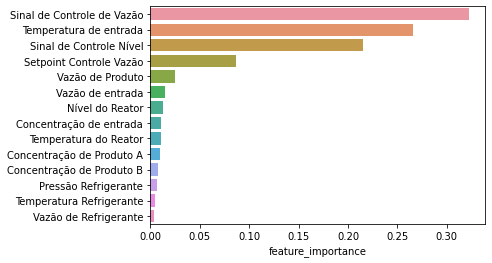

In [ ]:
df_fi_xgb = pd.DataFrame(feature_importance,index=columns,columns=["feature_importance"])
df_fi_xgb = df_fi_xgb.sort_values(by=['feature_importance'],ascending=False)
sns.barplot(x=df_fi_xgb['feature_importance'],y=df_fi_xgb.index,data=df_fi_xgb);

In [ ]:
X_train = X_train.loc[:,list(df_fi_xgb.iloc[0:7].index)]
X_test = X_test.loc[:,list(df_fi_xgb.iloc[0:7].index)]
X_train.head()

,Sinal de Controle de Vazão,Temperatura de entrada,Sinal de Controle Nível,Setpoint Controle Vazão,Vazão de Produto,Vazão de entrada,Nível do Reator
0,-0.338135,-0.266767,-0.236141,-0.235859,0.391433,0.085706,0.271804
1,-0.312300,-0.895032,0.063783,-0.143308,-0.566950,0.419224,0.591398
2,-0.353227,-0.609748,-0.620277,-0.010357,0.915393,-2.274574,0.095701
3,-0.283140,0.457661,-0.188856,-0.487069,0.822540,-1.628062,1.171886
4,-0.317416,0.255718,-0.373493,-0.614143,-0.437618,1.383861,-1.547928


### RFE - Recursive Feature Elimination

In [ ]:
model = LinearSVC()
rfe = RFE(model, step=1).fit(X_train, Y_train)

In [ ]:
X_train = X_train.loc[:,rfe.support_]
X_test = X_test.loc[:,rfe.support_]
X_train.head()

,Sinal de Controle de Vazão,Temperatura de entrada,Sinal de Controle Nível
0,-0.338135,-0.266767,-0.236141
1,-0.312300,-0.895032,0.063783
2,-0.353227,-0.609748,-0.620277
3,-0.283140,0.457661,-0.188856
4,-0.317416,0.255718,-0.373493


# Overview Classificadores e Métricas


Os algoritmos a serem implementados são:
*   KNN (K-Nearest Neighbors)
*   Random Forest
*   CNN




As métricas a serem avalidas são:


*   Acurácia
*   Precisão
*   Sensitivity/recall
*   F1-score






# Modelos e Resultados

## Split train/test and scaling

In [ ]:
def train_test(df_train,df_test,i):

  #Train
  Y_train = df_train.Falha
  X_train = df_train.drop(columns =['Falha','data'], axis=1)
  
  #scaling train
  scaler = StandardScaler()
  scaler.fit(X_train)
  columns = X_train.columns
  X_train = pd.DataFrame(scaler.transform(X_train),columns=columns)

  #Teste
  Y_test = df_test.Falha
  X_test = df_test.drop(columns =['Falha','data'], axis=1)
  
  #scaling
  columns = X_test.columns
  X_test = pd.DataFrame(scaler.transform(X_test),columns=columns)

  xgb = XGBClassifier()
  xgb.fit(X_train,Y_train)
  feature_importance = xgb.feature_importances_

  df_fi_xgb = pd.DataFrame(feature_importance,index=columns,columns=["feature_importance"])
  df_fi_xgb = df_fi_xgb.sort_values(by=['feature_importance'],ascending=False)

  X_train = X_train.loc[:,list(df_fi_xgb.iloc[0:i].index)]
  X_test = X_test.loc[:,list(df_fi_xgb.iloc[0:i].index)]
  
  return X_train,Y_train,X_test,Y_test

## Geração do Modelo

In [ ]:
######## Geração do Modelo ########

def modelo(modelo,X_train,Y_train,X_test,Y_test):

  modelo.fit(X_train,Y_train)

  ######## Prediação ########
  y_pred = modelo.predict(X_test)

  ######## Metricas para cada rótulo #######
  labels_test = sorted(list(dict.fromkeys(Y_test))) # Monta uma lista com os os rotulos, sem valores duplicados e de ordem crescente
  print("-------- Métricas para cada rotulo --------")
  cr = classification_report(Y_test,y_pred,labels_test)
  print(cr)
  print("\n")

  ######## Metricas globais do modelo conforme media de ponterada de cada rotulo ########
  acc = accuracy_score(Y_test,y_pred)
  pre = precision_score(Y_test,y_pred,average='weighted')
  f1_s = f1_score(Y_test,y_pred,average='weighted')
  rec = recall_score(Y_test,y_pred,average='weighted')

  print("-------- Métricas do modelo --------")
  print("Acurácia: {:.2f}".format(acc))
  print("Precisão: {:.2f}".format(pre))
  print("F1-Score: {:.2f}".format(f1_s))
  print("Recall: {:.2f}".format(rec))
  print("\n")

  ####### Matriz de Confusão multiclass
  labels_train = sorted(list(dict.fromkeys(Y_train))) # Monta uma lista com os os rotulos, sem valores duplicados e de ordem crescente
  cm = confusion_matrix(Y_test,y_pred,labels_train)
  df_cm = pd.DataFrame(cm, index = labels_train,columns = labels_train)
  plt.figure(figsize=(10,7))
  sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt="d",cmap="YlGnBu");

## KNN

### Falha 2

-------- Métricas para cada rotulo --------
              precision    recall  f1-score   support

           1       0.97      1.00      0.99       198
           2       1.00      0.94      0.97       103

    accuracy                           0.98       301
   macro avg       0.99      0.97      0.98       301
weighted avg       0.98      0.98      0.98       301



-------- Métricas do modelo --------
Acurácia: 0.98
Precisão: 0.98
F1-Score: 0.98
Recall: 0.98




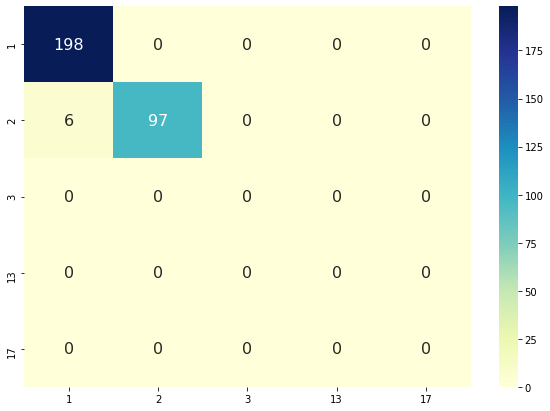

In [ ]:
######## Feature engineering ########
X_train,Y_train,X_test,Y_test = train_test(df_train_full,df_test_2,14) 

######## Geração do Modelo ########
knn_clf = KNeighborsClassifier(n_neighbors=9)

####### Resultados ######
modelo(knn_clf,X_train,Y_train,X_test,Y_test)

### Falha 3

-------- Métricas para cada rotulo --------
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       198
           3       1.00      0.93      0.96       103

   micro avg       0.98      0.97      0.97       301
   macro avg       0.98      0.96      0.97       301
weighted avg       0.98      0.97      0.97       301



-------- Métricas do modelo --------
Acurácia: 0.97
Precisão: 0.98
F1-Score: 0.97
Recall: 0.97




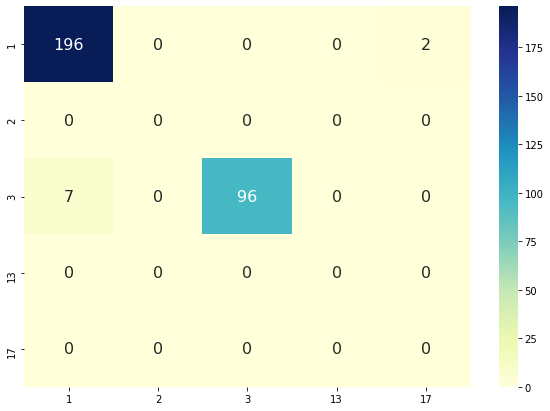

In [ ]:
######## Feature engineering ########
X_train,Y_train,X_test,Y_test = train_test(df_train_full,df_test_3,14) 

######## Geração do Modelo ########
knn_clf = KNeighborsClassifier(n_neighbors=2)

####### Resultados ######
modelo(knn_clf,X_train,Y_train,X_test,Y_test)

### Falha 13

-------- Métricas para cada rotulo --------
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       198
          13       1.00      0.92      0.96       103

    accuracy                           0.97       301
   macro avg       0.98      0.96      0.97       301
weighted avg       0.97      0.97      0.97       301



-------- Métricas do modelo --------
Acurácia: 0.97
Precisão: 0.97
F1-Score: 0.97
Recall: 0.97




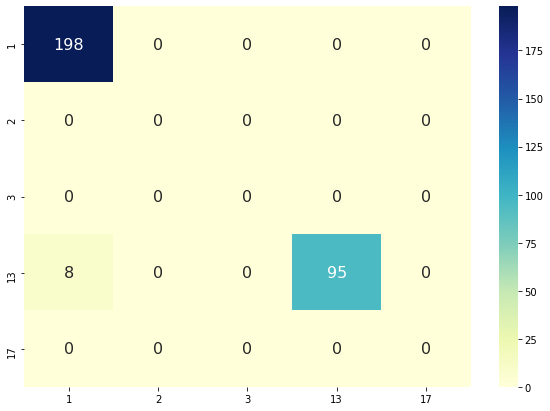

In [ ]:
######## Feature engineering ########
X_train,Y_train,X_test,Y_test = train_test(df_train_full,df_test_13,14) 

######## Geração do Modelo ########
knn_clf = KNeighborsClassifier(n_neighbors=10)

####### Resultados ######
modelo(knn_clf,X_train,Y_train,X_test,Y_test)

### Falha 17

-------- Métricas para cada rotulo --------
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       198
          17       1.00      0.98      0.99       103

    accuracy                           0.99       301
   macro avg       0.99      0.99      0.99       301
weighted avg       0.99      0.99      0.99       301



-------- Métricas do modelo --------
Acurácia: 0.99
Precisão: 0.99
F1-Score: 0.99
Recall: 0.99




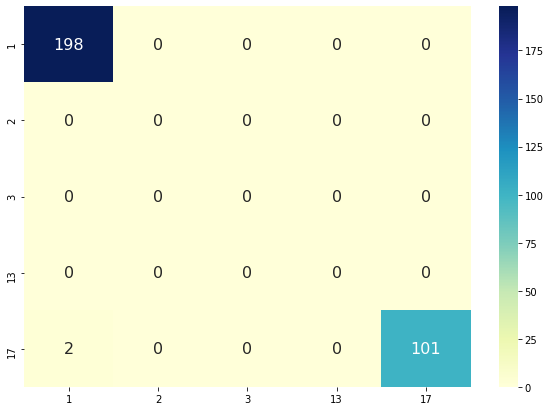

In [ ]:
######## Feature engineering ########
X_train,Y_train,X_test,Y_test = train_test(df_train_full,df_test_17,14) 

######## Geração do Modelo ########
knn_clf = KNeighborsClassifier(n_neighbors=1)

####### Resultados ######
modelo(knn_clf,X_train,Y_train,X_test,Y_test)

## Randon Forest

### Falha 2

-------- Métricas para cada rotulo --------
              precision    recall  f1-score   support

           1       0.97      1.00      0.99       198
           2       1.00      0.94      0.97       103

    accuracy                           0.98       301
   macro avg       0.99      0.97      0.98       301
weighted avg       0.98      0.98      0.98       301



-------- Métricas do modelo --------
Acurácia: 0.98
Precisão: 0.98
F1-Score: 0.98
Recall: 0.98




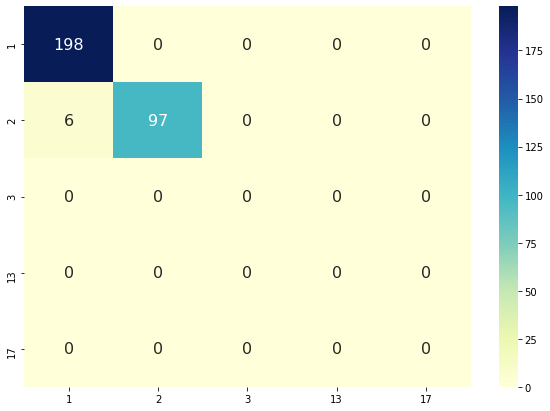

In [ ]:
######## Feature engineering ########
X_train,Y_train,X_test,Y_test = train_test(df_train_full,df_test_2,10) 

######## Geração do Modelo ########
rf_cfl = RandomForestClassifier(bootstrap=True,max_depth=80,max_features=1,min_samples_leaf=5,min_samples_split=12,n_estimators=200)

####### Resultados ######
modelo(rf_cfl,X_train,Y_train,X_test,Y_test)

### Falha 3

-------- Métricas para cada rotulo --------
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       198
           3       1.00      0.97      0.99       103

   micro avg       0.99      0.99      0.99       301
   macro avg       0.99      0.98      0.99       301
weighted avg       0.99      0.99      0.99       301



-------- Métricas do modelo --------
Acurácia: 0.99
Precisão: 0.99
F1-Score: 0.99
Recall: 0.99




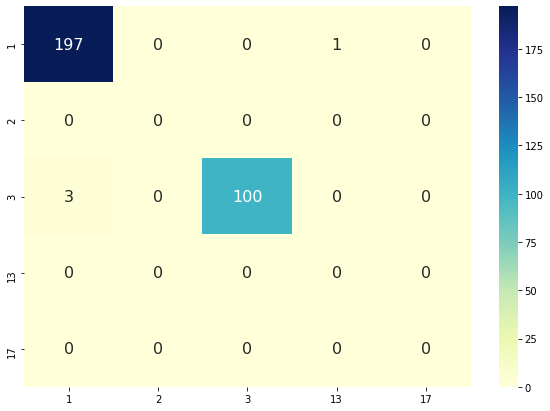

In [ ]:
######## Feature engineering ########
X_train,Y_train,X_test,Y_test = train_test(df_train_full,df_test_3,4)

######## Geração do Modelo ########
rf_cfl = RandomForestClassifier(bootstrap=True,max_depth=80,max_features=1,min_samples_leaf=5,min_samples_split=12,n_estimators=200)

####### Resultados ######
modelo(rf_cfl,X_train,Y_train,X_test,Y_test)

### Falha 13

-------- Métricas para cada rotulo --------
              precision    recall  f1-score   support

           1       0.98      0.99      0.98       198
          13       1.00      0.95      0.98       103

   micro avg       0.98      0.98      0.98       301
   macro avg       0.99      0.97      0.98       301
weighted avg       0.98      0.98      0.98       301



-------- Métricas do modelo --------
Acurácia: 0.98
Precisão: 0.98
F1-Score: 0.98
Recall: 0.98




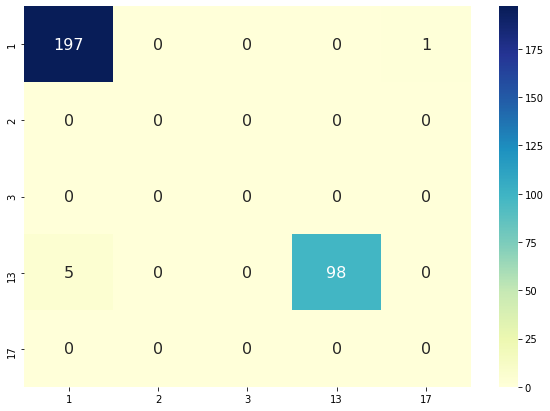

In [ ]:
######## Feature engineering ########
X_train,Y_train,X_test,Y_test = train_test(df_train_full,df_test_13,4)

######## Geração do Modelo ########
rf_cfl = RandomForestClassifier(bootstrap=True,max_depth=80,max_features=1,min_samples_leaf=5,min_samples_split=12,n_estimators=200)

####### Resultados ######
modelo(rf_cfl,X_train,Y_train,X_test,Y_test)

### Falha 17

-------- Métricas para cada rotulo --------
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       198
          17       1.00      0.97      0.99       103

    accuracy                           0.99       301
   macro avg       0.99      0.99      0.99       301
weighted avg       0.99      0.99      0.99       301



-------- Métricas do modelo --------
Acurácia: 0.99
Precisão: 0.99
F1-Score: 0.99
Recall: 0.99




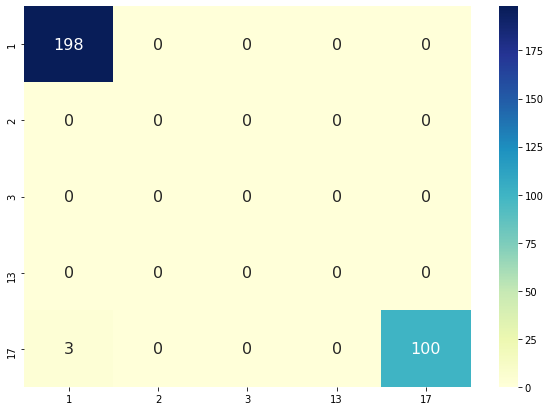

In [ ]:
######## Feature engineering ########
X_train,Y_train,X_test,Y_test = train_test(df_train_full,df_test_17,4)

######## Geração do Modelo ########
rf_cfl = RandomForestClassifier(bootstrap=True,max_depth=80,max_features=1,min_samples_leaf=5,min_samples_split=12,n_estimators=200)

####### Resultados ######
modelo(rf_cfl,X_train,Y_train,X_test,Y_test)

## Convolution Neural Network - FCN 

### Split train/test

In [ ]:
y_train = Y_train.to_numpy()
x_train = X_train.to_numpy()

y_test = Y_test.to_numpy()
x_test = X_test.to_numpy()

nb_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))

# transform the labels from integers to one hot vectors
enc = OneHotEncoder(categories='auto')
enc.fit(np.concatenate((y_train, y_test), axis=0).reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()

y_true = np.argmax(y_test, axis=1)

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1],1))

input_shape = x_train.shape[1:]

In [ ]:
input_layer = keras.layers.Input(input_shape)

conv1 = keras.layers.Conv1D(filters=128, kernel_size=8, padding='same')(input_layer)
conv1 = keras.layers.BatchNormalization()(conv1)
conv1 = keras.layers.Activation(activation='relu')(conv1)

conv2 = keras.layers.Conv1D(filters=256, kernel_size=5, padding='same')(conv1)
conv2 = keras.layers.BatchNormalization()(conv2)
conv2 = keras.layers.Activation('relu')(conv2)

conv3 = keras.layers.Conv1D(128, kernel_size=3,padding='same')(conv2)
conv3 = keras.layers.BatchNormalization()(conv3)
conv3 = keras.layers.Activation('relu')(conv3)

gap_layer = keras.layers.GlobalAveragePooling1D()(conv3)

output_layer = keras.layers.Dense(nb_classes, activation='softmax')(gap_layer)

model = keras.models.Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(),metrics=['accuracy'])


In [ ]:
batch_size = 16
nb_epochs = 2000

mini_batch_size = int(min(x_train.shape[0]/10, batch_size))

hist = model.fit(x_train, y_train, batch_size=mini_batch_size, epochs=nb_epochs,verbose=0)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
accuracy_score(y_true,y_pred)

1.0

# Comparação entre modelos

## Teste de Wilcoxon
